In [11]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
#Creating simulated time series data
np.random.seed(42)
time = pd.date_range(start='2023-01-01', periods=100, freq='D')
stationary_data = np.random.normal(0,1,100).cumsum()
nonstationary_data = np.sin(np.linspace(0,10,100)) + np.random.normal(0, 0.1, 100)

In [8]:
#Function to check staionarity & non stationarity using ADF and KPSS
def check_stationarity(data):
    adf_test = adfuller(data)
    kpss_test = kpss(data)
    return adf_test[1], kpss_test[1]

In [9]:
adf_stat, kpss_stat = check_stationarity(stationary_data)
adf_nonstat, kpss_nonstat = check_stationarity(nonstationary_data)

C:\Users\ramsu\AppData\Local\Temp\ipykernel_11912\2623036727.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data)
C:\Users\ramsu\AppData\Local\Temp\ipykernel_11912\2623036727.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data)


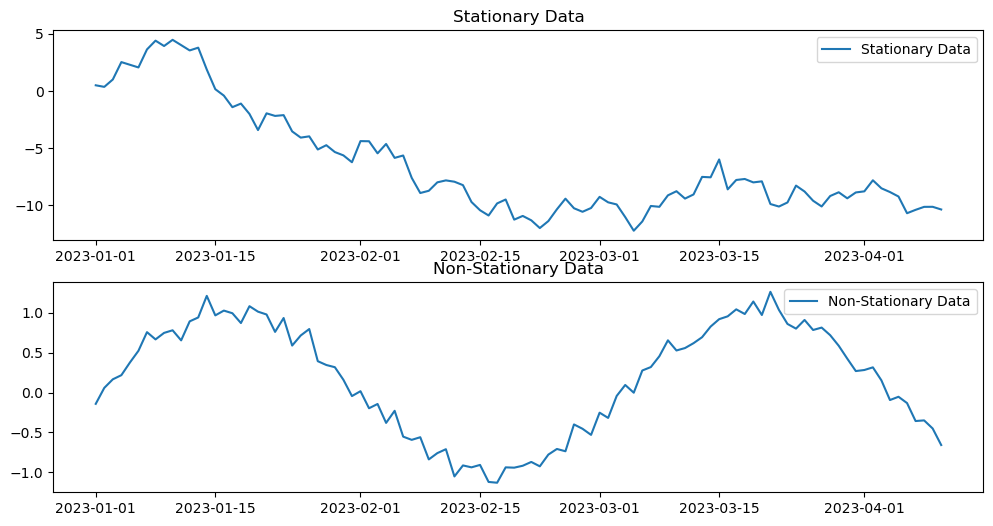

Stationary Data
ADF p-value: 0.6020814791099097, KPSS p-value: 0.01
Non-Stationary Data
ADF p-value: 8.531644319030465e-06, KPSS p-value: 0.1


In [12]:
#Plot the Test results
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(time, stationary_data, label = 'Stationary Data')
plt.title('Stationary Data')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time, nonstationary_data, label = 'Non-Stationary Data')
plt.title('Non-Stationary Data')
plt.legend()
plt.show()

#Test Resuls
print('Stationary Data')
print(f"ADF p-value: {adf_stat}, KPSS p-value: {kpss_stat}")
print('Non-Stationary Data')
print(f"ADF p-value: {adf_nonstat}, KPSS p-value: {kpss_nonstat}")

In [14]:
#Check stationarity using ADF test
def check_stationarity_adf(data):
    result = adfuller(data)
    print(f'ADF Statistic:, {result[0]}')
    print(f'p-value:, {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'     {key}: {value}')

In [15]:
print('Stationary Data Check')
check_stationarity_adf(stationary_data)
print('Non-Stationary Data Check')
check_stationarity_adf(nonstationary_data)

Stationary Data Check
ADF Statistic:, -1.3583317659818994
p-value:, 0.6020814791099097
Critical Values:
     1%: -3.498198082189098
     5%: -2.891208211860468
     10%: -2.5825959973472097
Non-Stationary Data Check
ADF Statistic:, -5.206393584428269
p-value:, 8.531644319030465e-06
Critical Values:
     1%: -3.505190196159122
     5%: -2.894232085048011
     10%: -2.5842101234567902


In [16]:
#Check using mean and variance method
def check_stationarity_mean_var(data):
    mean = data.mean()
    var = data.var()
    print(f"Mean: {mean}")
    print(f"Variance: {var}")

In [17]:
print('Stationary Data Check')
check_stationarity_mean_var(stationary_data)
print('Non-Stationary Data Check')
check_stationarity_mean_var(nonstationary_data)

Stationary Data Check
Mean: -6.405182462570341
Variance: 21.35105153940793
Non-Stationary Data Check
Mean: 0.18142360419742887
Variance: 0.466155551130657


In [18]:
#Seasonal decomposition
def seasonal_decomposition(data):
    decomposition = seasonal_decompose(data, model='additive', period=12)
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend()
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals')
    plt.legend()
    plt.show()

Stationary Data Check


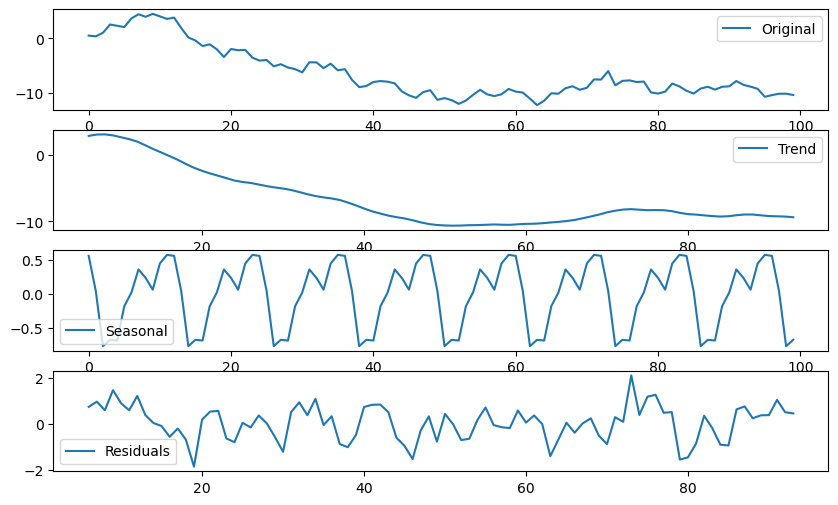

Non-Stationary Data Check


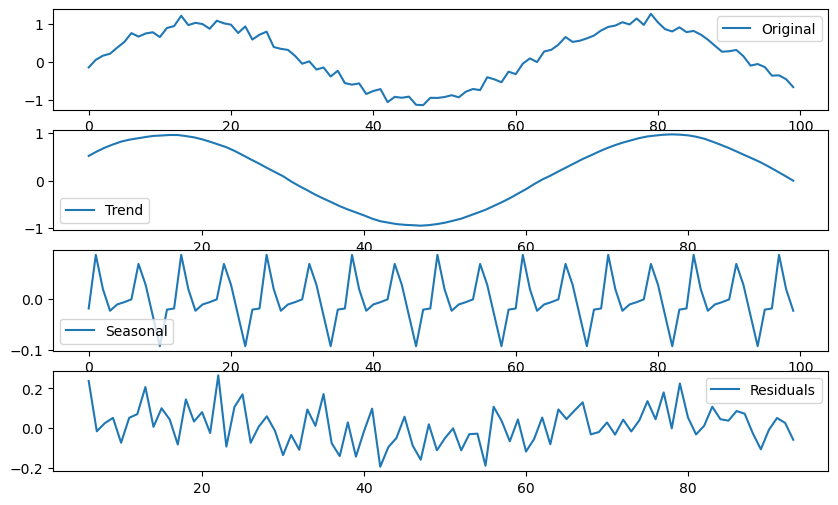

In [19]:
print('Stationary Data Check')
seasonal_decomposition(stationary_data)

print('Non-Stationary Data Check')
seasonal_decomposition(nonstationary_data)

In [20]:
#Fun to calculate and plot rolling statistics
def plot_rolling_stats(data):
    rol_mean = data.rolling(window=12).mean()
    rol_std = data.rolling(window=12).std()
    
    plt.figure(figsize=(12,6))
    plt.plot(data, label='Original Data')
    plt.plot(rol_mean, label='Rolling Mean')
    plt.plot(rol_std, label='Rolling STD')
    plt.legend()
    plt.title('Rolling Statistics')
    plt.show()

Stationary Data Check


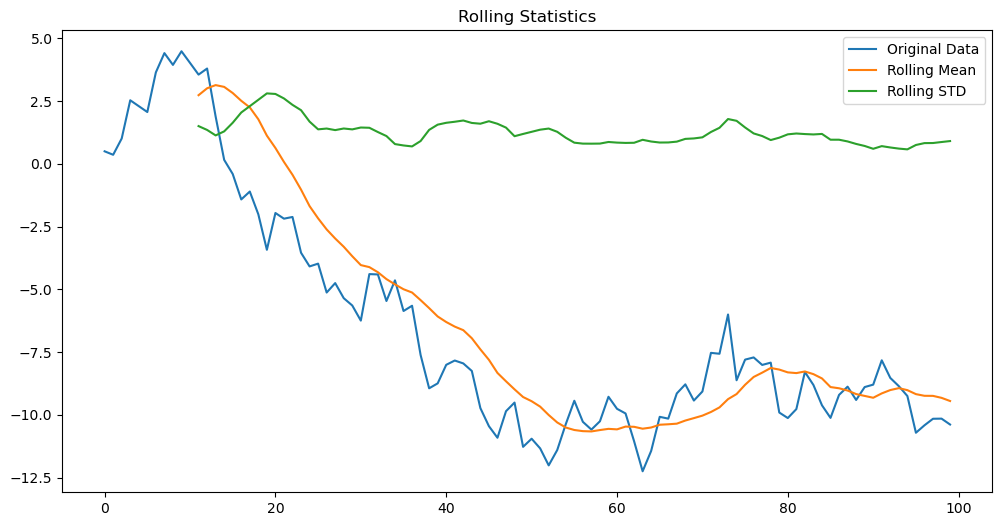

Non-Stationary Data Check


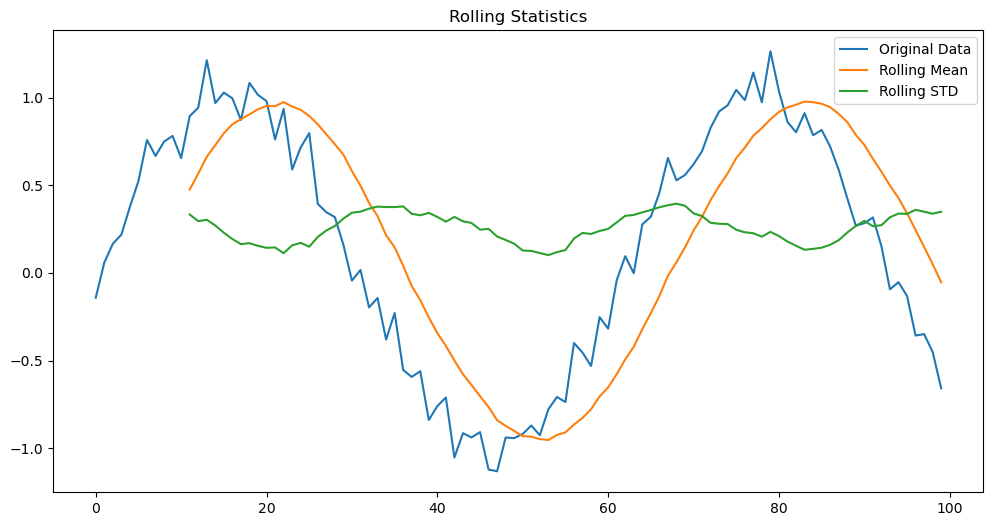

In [21]:
print('Stationary Data Check')
plot_rolling_stats(pd.Series(stationary_data))

print('Non-Stationary Data Check')
plot_rolling_stats(pd.Series(nonstationary_data))